In [1]:
import os
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import regex as re
from time import sleep
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, VotingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, make_scorer, r2_score, mean_absolute_error
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from lightgbm.sklearn import LGBMRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin
from mlxtend.regressor import StackingCVRegressor
from sklearn.svm import SVR
from sklearn.externals import joblib

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras import backend as K
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint


import warnings
warnings.filterwarnings('ignore')

/Users/eliregen/anaconda3/envs/py36/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)
/Users/eliregen/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: 

In [2]:
df = pd.read_csv('./roboBohr.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16242 entries, 0 to 16241
Columns: 1278 entries, Unnamed: 0 to Eat
dtypes: float64(1276), int64(2)
memory usage: 158.4 MB


In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
y = df['Eat']

In [6]:
X = df.drop(columns=['pubchem_id', 'Eat'])

In [7]:
y.head()

0   -19.013763
1   -10.161019
2    -9.376619
3   -13.776438
4    -8.537140
Name: Eat, dtype: float64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)

(11369, 1275) (4873, 1275)


In [9]:
ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc= ss.transform(X_test)

In [25]:
nn_models = {}
for i in range(4,9):
    for j in range(3,6):
        nn_models[str((i,j))] = MLPRegressor((i,j), activation='relu', learning_rate='adaptive')
        nn_models[str((i,j))].fit(X_train, y_train)
        print((i,j), nn_models[str((i,j))].score(X_train, y_train), 
              np.sqrt(mean_squared_error(y_test, nn_models[str((i,j))].predict(X_test))))

(4, 3) 0.9602870228646436 0.8684481467178276
(4, 4) 0.9869798322844361 0.6887213767821877
(4, 5) 0.9870687837348018 0.5911146497985937
(5, 3) 0.9785761278565747 0.7002133436284539
(5, 4) 0.922302190687036 0.9788853319575508
(5, 5) 0.9801312715645581 0.6511187704940113
(6, 3) 0.9917049693042219 0.5592296994326075
(6, 4) 0.3055919416497086 3.0462731314643
(6, 5) 0.9857095226755858 0.6755547470606897
(7, 3) 0.9738399952826781 0.7893722357442652
(7, 4) 0.9852738140265526 0.6764545041264153
(7, 5) 0.9899546227240249 0.551236877680121
(8, 3) 0.9902193615744089 0.5723207035744949
(8, 4) 0.962451514090024 0.8729869495906452
(8, 5) 0.9921161152543864 0.6811194047991985


In [9]:
xgboost_grid = pd.read_csv('xgboost_grid.csv')

In [10]:
xgboost_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_eval_metric,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,...,param_reg_lambda,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,294.038347,11.553681,0.507512,0.084625,0.2,rmse,0.0156,6,9,400,...,0,"{'colsample_bytree': 0.2, 'eval_metric': 'rmse...",0.999059,0.998777,0.999063,0.999164,0.999183,0.999049,0.000145,40
1,459.409907,14.336957,0.718571,0.288475,0.2,rmse,0.0156,6,9,600,...,0,"{'colsample_bytree': 0.2, 'eval_metric': 'rmse...",0.999268,0.998993,0.999276,0.999336,0.999370,0.999249,0.000133,14
2,2457.968370,1765.243059,0.473443,0.127449,0.2,rmse,0.0156,6,10,400,...,0,"{'colsample_bytree': 0.2, 'eval_metric': 'rmse...",0.999057,0.998768,0.999061,0.999162,0.999189,0.999047,0.000149,42
3,1248.653586,1429.168859,0.719830,0.217461,0.2,rmse,0.0156,6,10,600,...,0,"{'colsample_bytree': 0.2, 'eval_metric': 'rmse...",0.999265,0.998981,0.999276,0.999339,0.999373,0.999247,0.000139,15
4,381.401560,5.582550,0.604744,0.137968,0.2,rmse,0.0156,6,11,400,...,0,"{'colsample_bytree': 0.2, 'eval_metric': 'rmse...",0.999054,0.998775,0.999062,0.999162,0.999189,0.999049,0.000147,41
5,633.996257,62.220302,0.848202,0.274835,0.2,rmse,0.0156,6,11,600,...,0,"{'colsample_bytree': 0.2, 'eval_metric': 'rmse...",0.999259,0.999009,0.999272,0.999341,0.999375,0.999251,0.000129,13
6,482.592856,44.507498,0.842158,0.157051,0.2,rmse,0.0156,8,9,400,...,0,"{'colsample_bytree': 0.2, 'eval_metric': 'rmse...",0.998928,0.998586,0.998997,0.999118,0.999117,0.998949,0.000196,60
7,563.142867,38.154015,0.617772,0.035911,0.2,rmse,0.0156,8,9,600,...,0,"{'colsample_bytree': 0.2, 'eval_metric': 'rmse...",0.999051,0.998731,0.999140,0.999233,0.999247,0.999080,0.000189,35
8,330.876423,2.234285,0.439036,0.023050,0.2,rmse,0.0156,8,10,400,...,0,"{'colsample_bytree': 0.2, 'eval_metric': 'rmse...",0.998939,0.998601,0.998992,0.999122,0.999121,0.998955,0.000191,58
9,491.885414,0.592714,0.606554,0.056945,0.2,rmse,0.0156,8,10,600,...,0,"{'colsample_bytree': 0.2, 'eval_metric': 'rmse...",0.999060,0.998763,0.999146,0.999239,0.999253,0.999092,0.000179,33


In [146]:
model = Sequential()
model.add(Dense(1000, input_dim=X.shape[1],kernel_initializer='normal', activation='sigmoid'))
model.add(Dropout(0.05))
model.add(Dense(500,kernel_initializer='normal', activation='sigmoid'))
model.add(Dropout(0.05))
model.add(Dense(45,kernel_initializer='normal'))
model.add(Dropout(0.05))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-2, patience=5, verbose=1, mode='auto')

In [147]:
history = model.fit(X_train, y_train,validation_data=(X_test,y_test),callbacks=[monitor],verbose=1,epochs=20)

Train on 11369 samples, validate on 4873 samples
Epoch 1/20
11369/11369 [==============================] - 100s 9ms/step - loss: 2.2747 - val_loss: 0.2253
Epoch 2/20
11369/11369 [==============================] - 45s 4ms/step - loss: 0.4587 - val_loss: 0.1167
Epoch 3/20
11369/11369 [==============================] - 39s 3ms/step - loss: 0.3612 - val_loss: 0.1317
Epoch 4/20
11369/11369 [==============================] - 54s 5ms/step - loss: 0.3732 - val_loss: 0.3175
Epoch 5/20
11369/11369 [==============================] - 47s 4ms/step - loss: 0.3626 - val_loss: 0.2804
Epoch 6/20
11369/11369 [==============================] - 44s 4ms/step - loss: 0.3630 - val_loss: 0.1382
Epoch 7/20
11369/11369 [==============================] - 66s 6ms/step - loss: 0.3525 - val_loss: 0.1071
Epoch 00007: early stopping


dict_keys(['val_loss', 'loss'])


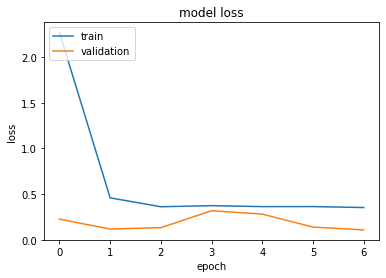

In [148]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [149]:
hist_pred = model.predict(X_test)

In [30]:
def rmse_fun(predicted, actual):
    return np.sqrt(mean_squared_error(y_test, hist_pred))

In [150]:
rmse_fun(y_test, hist_pred) 

0.32730833377367125

In [151]:
model.predict(X_train)

array([[-14.62808  ],
       [-14.361696 ],
       [-12.678047 ],
       ...,
       [-10.266216 ],
       [-17.202717 ],
       [ -7.6958346]], dtype=float32)

In [152]:
hist_pred.reshape((4873,))

array([-12.375125 , -14.9746065, -15.711248 , ..., -10.114859 ,
       -11.7536335,  -7.537242 ], dtype=float32)

In [153]:
rmse_fun(y_test, hist_pred.reshape((4873,)))

0.32730833377367125

In [86]:
xgb_model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.2, eval_metric='rmse',
             gamma=0, importance_type='gain', learning_rate = 0.0625,
             max_delta_step=0, max_depth = 5, min_child_weight = 9, missing=None,
             n_estimators=3000, n_jobs=-1, nthread=None,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=0, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1)

In [87]:
xgb_model.fit(X_train, y_train, verbose=1)
y_pred_xgb = xgb_model.predict(X_test)
print("The error for xgb model is " + str(np.sqrt(mean_squared_error(y_test, y_pred_xgb))))

The error for xgb model is 0.07274142128838246


In [85]:
0.07295909287291316

0.07295909287291316

In [94]:
np.sqrt(mean_squared_error(y_train, xgb_model.predict(X_train)))

0.008114347921282534

In [84]:
0.010392171573046807

0.010392171573046807

In [28]:
xgb_model2 = XGBRegressor(objective='reg:linear', eval_metric = 'rmse', learning_rate = 0.0625, reg_lambda = 0,
                         max_depth = 6, colsample_bytree = 0.2, min_child_weight = 11, n_estimators = 600)

In [108]:
lgbm_model = lgbm_test = LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=0.5,
              importance_type='split', learning_rate=0.1, max_depth=5,
              min_child_samples=26, min_child_weight=4, min_split_gain=0.0,
              n_estimators=2500, n_jobs=2, num_leaves =22,
              objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)

In [109]:
lgbm_model.fit(X_train, y_train, verbose=1)
y_pred_lgbm = lgbm_model.predict(X_test)
print("The error for lgb model is " + str(np.sqrt(mean_squared_error(y_test, y_pred_lgbm))))

The error for lgb model is 0.07824556296135753


In [110]:
0.07824556296135753

0.07824556296135753

In [111]:
np.sqrt(mean_squared_error(y_train, lgbm_model.predict(X_train)))

0.016427869058813573

In [99]:
0.02778048784340118

0.02778048784340118

In [187]:
knn = KNeighborsRegressor(n_neighbors=3,
                         weights='uniform',
                          algorithm='auto',
                          leaf_size=80,
                          p=1,
                          metric='minkowski',
                          metric_params=None,
                          n_jobs=3,)
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=80, metric='minkowski',
                    metric_params=None, n_jobs=3, n_neighbors=3, p=1,
                    weights='uniform')

In [188]:
knn_pred = knn.predict(X_test)
print("The error for knn model is " + str(np.sqrt(mean_squared_error(y_test, knn_pred))))

The error for knn model is 0.26687925312758193


In [170]:
0.27415052551252345

0.27415052551252345

In [184]:
np.sqrt(mean_squared_error(y_train, knn.predict(X_train)))

0.17741826585282713

In [172]:
0.14787086044700148

0.14787086044700148

In [161]:
start_time = time.time()
pipe = Pipeline([
    ('sc', StandardScaler()),
    ('knn', KNeighborsRegressor())
])
'distance'
param_dist = {"knn__n_neighbors": [2, 3, 5],
              "knn__weights": ['uniform'],
              "knn__leaf_size": [80, 90, 100],
              "knn__p":[1, 2, 3],
              "knn__metric":['minkowski']
             }
#, 'distance'
CV = GridSearchCV(pipe, param_grid = param_dist, scoring = 'neg_mean_absolute_error', n_jobs= 2, cv=5, verbose=1)
CV.fit(X, y)  
print(" Seconds %0.3f" % (time.time() - start_time))
print('Best score and parameter combination = ')

print(CV.best_score_)    
print(CV.best_params_) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 51.8min
[Parallel(n_jobs=2)]: Done 135 out of 135 | elapsed: 186.5min finished


 Seconds 11211.977
Best score and parameter combination = 
-0.14002564179226554
{'knn__leaf_size': 80, 'knn__metric': 'minkowski', 'knn__n_neighbors': 2, 'knn__p': 1, 'knn__weights': 'uniform'}


In [33]:
rmse = make_scorer(rmse_fun, greater_is_better=False)
#let's see how long this all takes
start_time = time.time()
models = [
     ('Stacked', stacked_model),
]

In [34]:
scores = [
    -1.0 * cross_val_score(model, X_train.values, y_train.values, scoring=rmse, cv=5).mean()
    for _,model in models
]
print(" Seconds %0.3f" % (time.time() - start_time))

[10:06:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:09:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:13:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:18:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:21:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:25:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:30:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:33:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:36:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [35]:
scores

[0.27625960815911127]

In [36]:
xgb_model4 = XGBRegressor(objective='reg:linear', eval_metric = 'rmse', learning_rate = 0.0625, reg_lambda = 0.1,
                         max_depth = 6, colsample_bytree = 0.2, min_child_weight = 11, n_estimators = 600)

lgbm2_model = LGBMRegressor(num_leaves = 25, n_estimators = 250, min_child_weight = 5, max_depth = 4, learning_rate = 0.08,
                           colsample_bytree = 0.3)


stacked_model.fit(X_train, y_train)



[12:17:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:21:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:26:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:33:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:42:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:50:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


StackingCVRegressor(cv=5,
                    meta_regressor=Ridge(alpha=1.0, copy_X=True,
                                         fit_intercept=True, max_iter=None,
                                         normalize=False, random_state=None,
                                         solver='auto', tol=0.001),
                    n_jobs=None, pre_dispatch='2*n_jobs', random_state=None,
                    refit=True,
                    regressors=[XGBRegressor(base_score=0.5, booster='gbtree',
                                             colsample_bylevel=1,
                                             colsample_bynode=1,
                                             colsample_bytree=0.2,
                                             eval_met...
                                              learning_rate=0.08, max_depth=4,
                                              min_child_samples=20,
                                              min_child_weight=5,
                                

In [39]:
y_pred_stack = stacked_model.predict(X_test.as_matrix())
print("The score for stacked models is "+ str(np.sqrt(mean_squared_error(y_test, y_pred_stack))))

/Users/eliregen/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


The score for stacked models is 0.08173451712261762


In [ ]:
sstacked2_model = StackingCVRegressor(
    regressors=[xgb_model5, lgbm3_model],
    meta_regressor=Ridge()
)
xgb_model5 = XGBRegressor(objective='reg:linear', eval_metric = 'rmse', learning_rate = 0.01, reg_lambda = 0.1,
                         max_depth = 6, colsample_bytree = 0.2, min_child_weight = 11, n_estimators = 600)

lgbm3_model = LGBMRegressor(num_leaves = 25, n_estimators = 600, min_child_weight = 5, max_depth = 4, learning_rate = 0.01,
                           colsample_bytree = 0.5)


stacked2_model.fit(X_train, y_train)

In [40]:
stack2_pred = stacked2_model.predict(X_test)
print("The score for stacked models is "+ str(np.sqrt(mean_squared_error(y_test, stack2_pred))))

NameError: name 'stacked2_model' is not defined

In [ ]:
np.sqrt(mean_squared_error(y_train, stacked2_model.predict(X_train)))

In [54]:
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X, y, test_size=0.7, random_state=42)
print(X_train.shape, X_test.shape)

(11369, 1275) (4873, 1275)


In [ ]:
xgb_basemodel = XGBRegressor(objective='reg:squarederror', eval_metric = 'rmse', verbose=1)

In [ ]:
xgb_basemodel.fit(X_train, y_train)

In [ ]:
xgb_base_pred = xgb_basemodel.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, xgb_base_pred))

In [ ]:
xgb_basemodel.score(X_test, y_test)

In [ ]:
np.sqrt(mean_squared_error(y_train, xgb_basemodel.predict(X_train)))

In [194]:
#https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Disbursed'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain['Disbursed'], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['Disbursed'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Disbursed'], dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

In [208]:
xgb_gridsearcher.best_estimator_

{'colsample_bytree': 0.2,
 'eval_metric': 'rmse',
 'learning_rate': 0.0625,
 'max_depth': 6,
 'min_child_weight': 11,
 'n_estimators': 700,
 'objective': 'reg:squarederror',
 'reg_lambda': 0}

In [52]:
start_time = time.time()
xgb_parameters = {'objective':['reg:squarederror'],
    'eval_metric':['rmse'],
    'learning_rate':[0.0625],
    'reg_lambda' :[0],
    'max_depth' :[6],
    'colsample_bytree':[0.2],
    'min_child_weight':[8, 9, 10, 11],
    'n_estimators':[1000]
}

xgb_gridsearcher = GridSearchCV(XGBRegressor(), xgb_parameters, verbose=1, n_jobs=-1, cv=5)
xgb_gridsearcher.fit(X_train, y_train)
print(" Seconds %0.3f" % (time.time() - start_time))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 68.3min finished


 Seconds 8343.627


In [53]:
xgb_gridsearcher.best_params_

{'colsample_bytree': 0.2,
 'eval_metric': 'rmse',
 'learning_rate': 0.0625,
 'max_depth': 6,
 'min_child_weight': 9,
 'n_estimators': 1000,
 'objective': 'reg:squarederror',
 'reg_lambda': 0}

In [15]:
rf_model = RandomForestRegressor(n_estimators = 2000, n_jobs=-1, min_samples_split = 3, criterion='mse', 
                      max_features = 'auto', max_depth = 13, random_state=42, verbose=2)
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 2000building tree 2 of 2000

building tree 3 of 2000
building tree 4 of 2000
building tree 5 of 2000
building tree 6 of 2000
building tree 7 of 2000
building tree 8 of 2000
building tree 9 of 2000
building tree 10 of 2000
building tree 11 of 2000
building tree 12 of 2000
building tree 13 of 2000
building tree 14 of 2000
building tree 15 of 2000
building tree 16 of 2000
building tree 17 of 2000
building tree 18 of 2000
building tree 19 of 2000
building tree 20 of 2000
building tree 21 of 2000
building tree 22 of 2000
building tree 23 of 2000
building tree 24 of 2000
building tree 25 of 2000
building tree 26 of 2000
building tree 27 of 2000
building tree 28 of 2000
building tree 29 of 2000
building tree 30 of 2000
building tree 31 of 2000
building tree 32 of 2000
building tree 33 of 2000
building tree 34 of 2000
building tree 35 of 2000
building tree 36 of 2000


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.3min


building tree 37 of 2000
building tree 38 of 2000
building tree 39 of 2000
building tree 40 of 2000
building tree 41 of 2000
building tree 42 of 2000
building tree 43 of 2000
building tree 44 of 2000
building tree 45 of 2000
building tree 46 of 2000
building tree 47 of 2000
building tree 48 of 2000
building tree 49 of 2000
building tree 50 of 2000
building tree 51 of 2000
building tree 52 of 2000
building tree 53 of 2000
building tree 54 of 2000
building tree 55 of 2000
building tree 56 of 2000
building tree 57 of 2000
building tree 58 of 2000
building tree 59 of 2000
building tree 60 of 2000
building tree 61 of 2000
building tree 62 of 2000
building tree 63 of 2000
building tree 64 of 2000
building tree 65 of 2000
building tree 66 of 2000
building tree 67 of 2000
building tree 68 of 2000
building tree 69 of 2000building tree 70 of 2000

building tree 71 of 2000
building tree 72 of 2000
building tree 73 of 2000
building tree 74 of 2000
building tree 75 of 2000
building tree 76 of 2000


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.5min


building tree 159 of 2000
building tree 160 of 2000
building tree 161 of 2000
building tree 162 of 2000
building tree 163 of 2000
building tree 164 of 2000
building tree 165 of 2000
building tree 166 of 2000
building tree 167 of 2000
building tree 168 of 2000
building tree 169 of 2000
building tree 170 of 2000
building tree 171 of 2000
building tree 172 of 2000
building tree 173 of 2000
building tree 174 of 2000
building tree 175 of 2000
building tree 176 of 2000
building tree 177 of 2000
building tree 178 of 2000
building tree 179 of 2000
building tree 180 of 2000
building tree 181 of 2000
building tree 182 of 2000
building tree 183 of 2000
building tree 184 of 2000
building tree 185 of 2000
building tree 186 of 2000
building tree 187 of 2000
building tree 188 of 2000
building tree 189 of 2000
building tree 190 of 2000
building tree 191 of 2000
building tree 192 of 2000
building tree 193 of 2000
building tree 194 of 2000
building tree 195 of 2000
building tree 196 of 2000
building tre

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  9.0min


building tree 362 of 2000
building tree 363 of 2000
building tree 364 of 2000
building tree 365 of 2000
building tree 366 of 2000
building tree 367 of 2000
building tree 368 of 2000
building tree 369 of 2000
building tree 370 of 2000
building tree 371 of 2000
building tree 372 of 2000
building tree 373 of 2000
building tree 374 of 2000
building tree 375 of 2000
building tree 376 of 2000
building tree 377 of 2000
building tree 378 of 2000
building tree 379 of 2000
building tree 380 of 2000
building tree 381 of 2000
building tree 382 of 2000
building tree 383 of 2000
building tree 384 of 2000
building tree 385 of 2000
building tree 386 of 2000
building tree 387 of 2000
building tree 388 of 2000
building tree 389 of 2000
building tree 390 of 2000
building tree 391 of 2000
building tree 392 of 2000
building tree 393 of 2000
building tree 394 of 2000
building tree 395 of 2000
building tree 396 of 2000
building tree 397 of 2000
building tree 398 of 2000
building tree 399 of 2000
building tre

[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 15.4min


building tree 645 of 2000
building tree 646 of 2000
building tree 647 of 2000
building tree 648 of 2000
building tree 649 of 2000
building tree 650 of 2000
building tree 651 of 2000
building tree 652 of 2000
building tree 653 of 2000
building tree 654 of 2000
building tree 655 of 2000
building tree 656 of 2000
building tree 657 of 2000
building tree 658 of 2000
building tree 659 of 2000
building tree 660 of 2000
building tree 661 of 2000
building tree 662 of 2000
building tree 663 of 2000
building tree 664 of 2000
building tree 665 of 2000
building tree 666 of 2000
building tree 667 of 2000
building tree 668 of 2000
building tree 669 of 2000
building tree 670 of 2000
building tree 671 of 2000
building tree 672 of 2000
building tree 673 of 2000
building tree 674 of 2000
building tree 675 of 2000
building tree 676 of 2000
building tree 677 of 2000
building tree 678 of 2000
building tree 679 of 2000
building tree 680 of 2000
building tree 681 of 2000
building tree 682 of 2000
building tre

building tree 962 of 2000
building tree 963 of 2000
building tree 964 of 2000
building tree 965 of 2000
building tree 966 of 2000
building tree 967 of 2000
building tree 968 of 2000
building tree 969 of 2000
building tree 970 of 2000
building tree 971 of 2000
building tree 972 of 2000
building tree 973 of 2000
building tree 974 of 2000
building tree 975 of 2000
building tree 976 of 2000
building tree 977 of 2000
building tree 978 of 2000
building tree 979 of 2000
building tree 980 of 2000
building tree 981 of 2000
building tree 982 of 2000
building tree 983 of 2000
building tree 984 of 2000
building tree 985 of 2000
building tree 986 of 2000
building tree 987 of 2000
building tree 988 of 2000
building tree 989 of 2000
building tree 990 of 2000
building tree 991 of 2000
building tree 992 of 2000
building tree 993 of 2000
building tree 994 of 2000
building tree 995 of 2000
building tree 996 of 2000
building tree 997 of 2000
building tree 998 of 2000
building tree 999 of 2000
building tre

[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 23.7min


building tree 1010 of 2000
building tree 1011 of 2000
building tree 1012 of 2000
building tree 1013 of 2000
building tree 1014 of 2000
building tree 1015 of 2000
building tree 1016 of 2000
building tree 1017 of 2000
building tree 1018 of 2000
building tree 1019 of 2000
building tree 1020 of 2000
building tree 1021 of 2000
building tree 1022 of 2000
building tree 1023 of 2000
building tree 1024 of 2000
building tree 1025 of 2000
building tree 1026 of 2000
building tree 1027 of 2000
building tree 1028 of 2000
building tree 1029 of 2000
building tree 1030 of 2000
building tree 1031 of 2000
building tree 1032 of 2000
building tree 1033 of 2000
building tree 1034 of 2000
building tree 1035 of 2000
building tree 1036 of 2000
building tree 1037 of 2000
building tree 1038 of 2000
building tree 1039 of 2000
building tree 1040 of 2000
building tree 1041 of 2000
building tree 1042 of 2000
building tree 1043 of 2000
building tree 1044 of 2000
building tree 1045 of 2000
building tree 1046 of 2000
b

building tree 1315 of 2000
building tree 1316 of 2000
building tree 1317 of 2000
building tree 1318 of 2000
building tree 1319 of 2000
building tree 1320 of 2000
building tree 1321 of 2000
building tree 1322 of 2000
building tree 1323 of 2000
building tree 1324 of 2000
building tree 1325 of 2000
building tree 1326 of 2000
building tree 1327 of 2000
building tree 1328 of 2000
building tree 1329 of 2000
building tree 1330 of 2000
building tree 1331 of 2000
building tree 1332 of 2000
building tree 1333 of 2000
building tree 1334 of 2000
building tree 1335 of 2000
building tree 1336 of 2000
building tree 1337 of 2000
building tree 1338 of 2000
building tree 1339 of 2000
building tree 1340 of 2000
building tree 1341 of 2000
building tree 1342 of 2000
building tree 1343 of 2000
building tree 1344 of 2000
building tree 1345 of 2000
building tree 1346 of 2000
building tree 1347 of 2000
building tree 1348 of 2000
building tree 1349 of 2000
building tree 1350 of 2000
building tree 1351 of 2000
b

[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 33.7min


building tree 1454 of 2000
building tree 1455 of 2000
building tree 1456 of 2000
building tree 1457 of 2000
building tree 1458 of 2000
building tree 1459 of 2000
building tree 1460 of 2000
building tree 1461 of 2000
building tree 1462 of 2000
building tree 1463 of 2000
building tree 1464 of 2000
building tree 1465 of 2000
building tree 1466 of 2000
building tree 1467 of 2000
building tree 1468 of 2000
building tree 1469 of 2000
building tree 1470 of 2000
building tree 1471 of 2000
building tree 1472 of 2000
building tree 1473 of 2000
building tree 1474 of 2000
building tree 1475 of 2000
building tree 1476 of 2000
building tree 1477 of 2000
building tree 1478 of 2000
building tree 1479 of 2000
building tree 1480 of 2000
building tree 1481 of 2000
building tree 1482 of 2000
building tree 1483 of 2000
building tree 1484 of 2000
building tree 1485 of 2000
building tree 1486 of 2000
building tree 1487 of 2000
building tree 1488 of 2000
building tree 1489 of 2000
building tree 1490 of 2000
b

building tree 1758 of 2000
building tree 1759 of 2000
building tree 1760 of 2000
building tree 1761 of 2000
building tree 1762 of 2000
building tree 1763 of 2000
building tree 1764 of 2000
building tree 1765 of 2000
building tree 1766 of 2000
building tree 1767 of 2000
building tree 1768 of 2000
building tree 1769 of 2000
building tree 1770 of 2000
building tree 1771 of 2000
building tree 1772 of 2000
building tree 1773 of 2000
building tree 1774 of 2000
building tree 1775 of 2000
building tree 1776 of 2000
building tree 1777 of 2000
building tree 1778 of 2000
building tree 1779 of 2000
building tree 1780 of 2000
building tree 1781 of 2000
building tree 1782 of 2000
building tree 1783 of 2000
building tree 1784 of 2000
building tree 1785 of 2000
building tree 1786 of 2000
building tree 1787 of 2000
building tree 1788 of 2000
building tree 1789 of 2000
building tree 1790 of 2000
building tree 1791 of 2000
building tree 1792 of 2000
building tree 1793 of 2000
building tree 1794 of 2000
b

[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 45.5min


building tree 1981 of 2000
building tree 1982 of 2000
building tree 1983 of 2000
building tree 1984 of 2000
building tree 1985 of 2000
building tree 1986 of 2000
building tree 1987 of 2000
building tree 1988 of 2000
building tree 1989 of 2000
building tree 1990 of 2000
building tree 1991 of 2000
building tree 1992 of 2000
building tree 1993 of 2000
building tree 1994 of 2000
building tree 1995 of 2000
building tree 1996 of 2000
building tree 1997 of 2000
building tree 1998 of 2000
building tree 1999 of 2000
building tree 2000 of 2000


[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed: 46.0min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, n_estimators=2000,
                      n_jobs=-1, oob_score=False, random_state=42, verbose=2,
                      warm_start=False)

In [16]:
print(np.sqrt(mean_squared_error(y_test, rf_model.predict(X_test))))
print(np.sqrt(mean_squared_error(y_train, rf_model.predict(X_train))))
print(r2_score(y_train, rf_model.predict(X_train)))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    3.2s
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:    4.4s
[Parallel(n_jobs=4)]: Done 2000 out of 2000 | elapsed:    4.4s finished


0.14353837916595746


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    3.2s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    4.6s
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:    6.2s
[Parallel(n_jobs=4)]: Done 2000 out of 2000 | elapsed:    6.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


0.057181342070852646


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    4.0s


0.9997566175695646


[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:    5.3s
[Parallel(n_jobs=4)]: Done 2000 out of 2000 | elapsed:    5.3s finished


In [13]:
print(np.sqrt(mean_squared_error(y_test, rf_model.predict(X_test))))
print(np.sqrt(mean_squared_error(y_train, rf_model.predict(X_train))))
print(r2_score(y_train, rf_model.predict(X_train)))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 1600 out of 1600 | elapsed:    1.8s finished


0.1436493518680449


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done 1600 out of 1600 | elapsed:    3.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.1s


0.0571904713237121


[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    3.1s


0.9997565398492091


[Parallel(n_jobs=4)]: Done 1600 out of 1600 | elapsed:    3.5s finished


In [112]:
#WARNING: This takes a very long time to run.
start_time = time.time()
rf_parameters = {
    'max_depth' :[11, 12, 13],
    'min_samples_split':[3],
    'n_estimators':[1500]
}

rf_gridsearcher = GridSearchCV(RandomForestRegressor(criterion='mse', max_features = 'auto'), 
                               rf_parameters, verbose=2, n_jobs=-1, cv=5)
rf_gridsearcher.fit(X_train, y_train)
print(" Seconds %0.3f" % (time.time() - start_time))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 571.3min finished


 Seconds 40461.889


In [113]:
rf_gridsearcher.best_params_

{'max_depth': 13, 'min_samples_split': 3, 'n_estimators': 1500}

In [81]:
xgb_test = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.2, eval_metric='rmse',
             gamma=0, importance_type='gain', learning_rate = 0.0625,
             max_delta_step=0, max_depth = 5, min_child_weight = 9, missing=None,
             n_estimators=1400, n_jobs=-1, nthread=None,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=0, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1)


In [97]:
lgbm_test = LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=0.5,
              importance_type='split', learning_rate=0.1, max_depth=5,
              min_child_samples=26, min_child_weight=4, min_split_gain=0.0,
              n_estimators=600, n_jobs=1, num_leaves =22,
              objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)
#lgbm_test.fit(X_train, y_train)

In [49]:
start_time = time.time()
stacked_model_final = StackingCVRegressor(
    regressors=[xgb_test, lgbm_test, rf_model, history],
    meta_regressor=Ridge()
)
stacked_model_final.fit(X_train, y_train)
print(" Minutes %0.3f" % (time.time() - start_time))

NameError: name 'xgb_test' is not defined

In [103]:
stacked_model_final.predict(X_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 700 out of 700 | elapsed:    1.1s finished


array([-12.09088433, -14.59697644, -15.29570737, ..., -10.0243968 ,
       -11.48273995,  -7.65374434])

In [105]:
X_test = X_test.as_matrix()


AttributeError: 'numpy.ndarray' object has no attribute 'as_matrix'

In [106]:
X_train = X_train.as_matrix()

In [108]:
stacked_pred = stacked_model_final.predict(X_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 700 out of 700 | elapsed:    0.8s finished


In [113]:
print(np.sqrt(mean_squared_error(y_test, stacked_pred)))
print(np.sqrt(mean_squared_error(y_train, stacked_model_final.predict(X_train))))
print(r2_score(y_test, stacked_pred))

0.07092646627358168


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    1.2s


0.025632786944576016
0.9996212091573082


[Parallel(n_jobs=2)]: Done 700 out of 700 | elapsed:    1.7s finished


In [50]:
xgb_test = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.2, eval_metric='rmse',
             gamma=0, importance_type='gain', learning_rate = 0.0625,
             max_delta_step=0, max_depth = 5, min_child_weight = 9, missing=None,
             n_estimators=1400, n_jobs=-1, nthread=None,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=0, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1)


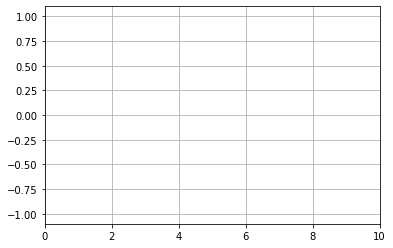

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def data_gen(t=0):
    cnt = 0
    while cnt < 1000:
        cnt += 1
        t += 0.1
        yield t, np.sin(2*np.pi*t) * np.exp(-t/10.)


def init():
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(0, 10)
    del xdata[:]
    del ydata[:]
    line.set_data(xdata, ydata)
    return line,

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.grid()
xdata, ydata = [], []


def run(data):
    # update the data
    t, y = data
    xdata.append(t)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()

    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
    line.set_data(xdata, ydata)

    return line,

ani = animation.FuncAnimation(fig, run, data_gen, blit=False, interval=10,
                              repeat=False, init_func=init)
plt.show()

In [118]:
def rmse_fun(predictions, y_test):
    return np.sqrt(mean_squared_error(y_test, predictions))

In [185]:
lgbm_model = LGBMRegressor(n_jobs=-1)
xgb_model = XGBRegressor(n_jobs=-1)
rf_model = RandomForestRegressor(n_estimators = 100, min_samples_split = 3, max_features = 'auto', max_depth = 8)
knn_model = KNeighborsRegressor(weights = 'distance', n_neighbors = 3, leaf_size = 90)
ridge_model = Ridge(alpha = 1000)
lasso_model = Lasso(alpha = 0.01, max_iter=10000)
enet_model = ElasticNet(alpha = 0.01, l1_ratio = 0.1, max_iter=10000)

In [120]:
# Ensemble method for averaging predictions 
class AveragingRegressor(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, regressors):
        self.regressors = regressors
        self.predictions = None

    def fit(self, X, y):
        for regr in self.regressors:
            regr.fit(X, y)
        return self

    def predict(self, X):
        self.predictions = np.column_stack([regr.predict(X) for regr in self.regressors])
        return np.mean(self.predictions, axis=1)
    
    
averaged_model = AveragingRegressor([xgb_model, lgbm_model])

In [186]:
lgbm_model.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [187]:
lgbm_pred = lgbm_model.predict(X_test)

In [189]:
xgb_model.fit(X_train, y_train)

[00:00:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [190]:
np.sqrt(mean_squared_error(y_test, xgb_model.predict(X_test)))

0.13502644147583798

In [188]:
np.sqrt(mean_squared_error(y_test, lgbm_pred))

0.09847218775246512

In [182]:
stacked_model = StackingCVRegressor(
    regressors=[xgb_model, lgbm_model],
    meta_regressor=Ridge()
)

In [ ]:
stacked_model.fit(X_train, )

In [122]:
rmse = make_scorer(rmse_fun, greater_is_better=False)
#let's see how long this all takes
start_time = time.time()

models = [
     ('XGBoost', xgb_model),
     ('LightGBM', lgbm_model),
     ('RandomForest', rf_model),
     ('Ridge', ridge_model),
     ('Lasso', lasso_model),
     ('ElasticNet', enet_model),
     ('KNN', knn_model),
     ('Averaged', averaged_model),
     ('Stacked', stacked_model),
]



In [126]:
start_time = time.time()
scores = [
    -1.0 * cross_val_score(model, X_train.values, y_train.values, scoring=rmse, cv=5, n_jobs=2).mean()
    for _,model in models
]
print(" Seconds %0.3f" % (time.time() - start_time))

 Seconds 11202.304


In [127]:
dataz4 = pd.DataFrame({ 'Model': [name for name, _ in models], 'Error (RMSE)': scores })

In [133]:
dataz4 = dataz4.append({'Model': 'Neural Net' , 'Error (RMSE)': 0.4261273879608461}, ignore_index=True)

In [191]:
dataz4

,Model,Error (RMSE)
0,XGBoost,0.087300
1,LightGBM,0.095604
2,RandomForest,0.196871
3,Ridge,0.821921
4,Lasso,0.915745
5,ElasticNet,0.903811
6,KNN,0.243210
7,Averaged,0.084234
8,Stacked,0.083640
9,Neural Net,0.426127


Text(0.5, 1.0, 'Model Performance')

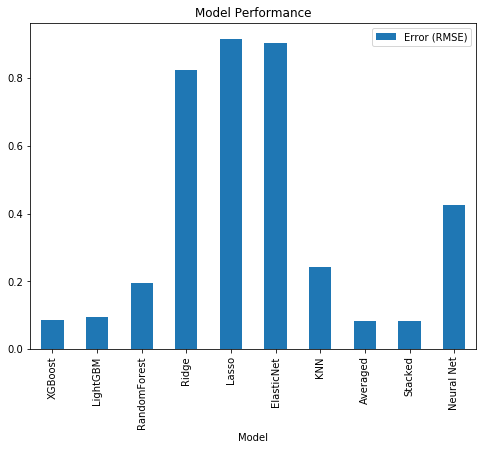

In [177]:
a = dataz4.plot(x='Model', kind='bar', figsize=(8,6))
plt.title("Model Performance")


In [179]:
  # s is an instance of Series
fig = a.get_figure()
fig.savefig('test.png')

In [102]:
start_time = time.time()
pipe = Pipeline([
    ('sc', StandardScaler()),
    ('rf_model', RandomForestRegressor())
])

param_dist = {"rf_model__max_depth": [8],
              "rf_model__n_estimators": [1000, 1500, 2000],
              "rf_model__min_samples_split": [3],
             }

CV = GridSearchCV(pipe, param_grid = param_dist, scoring = 'neg_mean_absolute_error', n_jobs= 2, cv=5, verbose=1)
CV.fit(X, y)  
print(" Seconds %0.3f" % (time.time() - start_time))
print('Best score and parameter combination = ')

print(CV.best_score_)    
print(CV.best_params_) 

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed: 648.8min finished


 Seconds 43667.158
Best score and parameter combination = 
-0.1423195518459505
{'rf_model__max_depth': 8, 'rf_model__min_samples_split': 3, 'rf_model__n_estimators': 1500}


In [190]:
rf_model = RandomForestRegressor(n_estimators = 1600, min_samples_split = 3, max_features = 'auto', 
                                 max_depth = None, n_jobs=-1, verbose=1)

In [36]:
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   53.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 27.8min
[Parallel(n_jobs=-1)]: Done 1700 out of 1700 | elapsed: 38.4min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1700,
                      n_jobs=-1, oob_score=False, random_state=None, verbose=1,
                      warm_start=False)

In [37]:
print(np.sqrt(mean_squared_error(y_test, rf_model.predict(X_test))))

print(np.sqrt(mean_squared_error(y_train, rf_model.predict(X_train))))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    3.8s
[Parallel(n_jobs=4)]: Done 1700 out of 1700 | elapsed:    5.2s finished


0.1424460364067801


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    3.3s


0.05239581000444951


[Parallel(n_jobs=4)]: Done 1700 out of 1700 | elapsed:    4.3s finished


In [33]:
print(np.sqrt(mean_squared_error(y_test, rf_model.predict(X_test))))

print(np.sqrt(mean_squared_error(y_train, rf_model.predict(X_train))))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1600 out of 1600 | elapsed:    2.0s finished


0.14230119735122027


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    4.5s


0.052517747265080884


[Parallel(n_jobs=4)]: Done 1600 out of 1600 | elapsed:    5.1s finished


In [191]:
stacked_model = StackingCVRegressor(
    regressors=[xgb_model, lgbm_model, rf_model, knn],
    meta_regressor=Ridge(),
    n_jobs=4, verbose=2
)

In [192]:
stacked_model.fit(X_train, y_train)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed: 86.0min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:  4.9min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed: 139.8min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   54.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done

StackingCVRegressor(cv=5,
                    meta_regressor=Ridge(alpha=1.0, copy_X=True,
                                         fit_intercept=True, max_iter=None,
                                         normalize=False, random_state=None,
                                         solver='auto', tol=0.001),
                    n_jobs=4, pre_dispatch='2*n_jobs', random_state=None,
                    refit=True,
                    regressors=[XGBRegressor(base_score=0.5, booster='gbtree',
                                             colsample_bylevel=1,
                                             colsample_bynode=1,
                                             colsample_bytree=0.2,
                                             eval_metric...
                                                      min_samples_split=3,
                                                      min_weight_fraction_leaf=0.0,
                                                      n_estimators=1600,
             

In [193]:
X_train = X_train.as_matrix()
X_test = X_test.as_matrix()

In [194]:
stack_pred = stacked_model.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    6.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   13.4s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   25.9s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:   39.4s
[Parallel(n_jobs=4)]: Done 1600 out of 1600 | elapsed:   51.9s finished


In [195]:
np.sqrt(mean_squared_error(y_test, stack_pred))

0.06724449175609974

In [199]:
joblib.dump(stacked_model, 'stacked_regressor.pkl')

['stacked_regressor.pkl']

In [96]:
np.sqrt(mean_squared_error(y_test, stack_pred))

0.07125374765257922

In [ ]:
stacked_train = stacked_model.predict(X_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    6.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   10.9s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:   15.5s
[Parallel(n_jobs=4)]: Done 1600 out of 1600 | elapsed:   17.3s finished


In [ ]:
np.sqrt(mean_squared_error(y_train, stacked_train))

In [93]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [94]:
y_test.shape

(4873, 1)

In [97]:
stacked_model.score(X_test, y_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    4.6s
[Parallel(n_jobs=4)]: Done 1600 out of 1600 | elapsed:    6.0s finished


0.9996177053252209

In [77]:
stacked_model.store_train_meta_features

False